As a warm-up project, the mathematical formula for the model is already provided: 

Price = -5,269 + 8,413 x Carat + 158.1 x Cut + 454 x Clarity

So what I do in this project is to verify the equation. 

## Step 1: Understanding the Model 
### 1. According to the linear model provided, if a diamond is 1 carat heavier than another with the same cut and clarity, how much more should we expect to pay? Why?

Ans: We expect to pay 8413 more, because this is the coefficient for Carat

### 2. If you were interested in a 1.5 carat diamond with a Very Good cut (represented by a 3 in the model) and a VS2 clarity rating (represented by a 5 in the model), how much would the model predict you should pay for it?

In [2]:
carat, cut, clarity = 1.5, 3, 5
price = -5269 + 8413 * carat + 158.1 * cut + 454 * clarity
print("The price is ", price)

The price is  10094.8


## Step 2: Visualize the Data 
### 1 - Plot the data for the diamonds in the database, with carat on the x-axis and price on the y-axis. 
### 2 - Plot the data for the diamonds for which you are predicting prices with carat on the x-axis and predicted price on the y-axis. 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
data = pd.read_csv("diamonds.csv")
test = pd.read_csv("new-diamonds.csv")

In [4]:
data.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [16]:
data.median()

Unnamed: 0     25000.5
carat              0.7
cut_ord            4.0
clarity_ord        4.0
price           2402.5
dtype: float64

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
Unnamed: 0     3000 non-null int64
carat          3000 non-null float64
cut            3000 non-null object
cut_ord        3000 non-null int64
color          3000 non-null object
clarity        3000 non-null object
clarity_ord    3000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 164.1+ KB


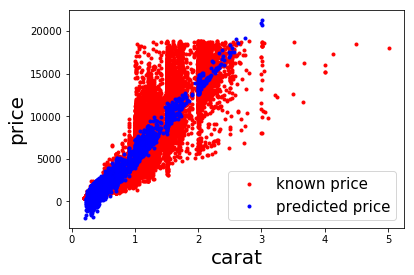

In [41]:
test['predict'] = -5269 + 8413 * test['carat'] + 158.1 * test['cut_ord'] + 454.0 * test['clarity_ord']

plot1, = plt.plot(data["carat"],data["price"],'.r',label ="known price")
plot2, = plt.plot(test["carat"],test["predict"],'.b',label = "predicted price")
plt.legend(handles=[plot1, plot2],fontsize = 15)
plt.xlabel("carat",fontsize = 20)
plt.ylabel("price",fontsize = 20)
plt.show()

In [42]:
test[test['predict']>19000]

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,predict
770,771,3.00,Very Good,3,H,I1,1,20898.30
1073,1074,2.74,Very Good,3,J,SI2,2,19164.92
1116,1117,3.01,Fair,1,H,I1,1,20666.23
2243,2244,3.01,Good,2,I,SI2,2,21278.33
2290,2291,2.59,Ideal,5,J,VS1,4,19127.17


### 3. What strikes you about this comparison? After seeing this plot, do you feel confident in the model’s ability to predict prices? 

Ans: The predicted prices increase linearly with the carat, and has good overlap with the known price. However, it seems the predicted prices increase much faster than known prices and cause some outliers at the high end. So I will apply some discount to correct the inflated slope.

## Step 3: Make a Recommendation
### What price do you recommend the jewelry company to bid? Please explain how you arrived at that number. HINT: The number should be 7 digits.

In [43]:
total = sum(test['predict'])*0.8
print("The bid price for 3000 diamonds:", total)

The bid price for 3000 diamonds: 9386818.208


Ans: I would bid 9.4 million for the whole set. I use a discount factor 0.8 to suppress the inflated price by the model. This is just an ad hoc strategy. 